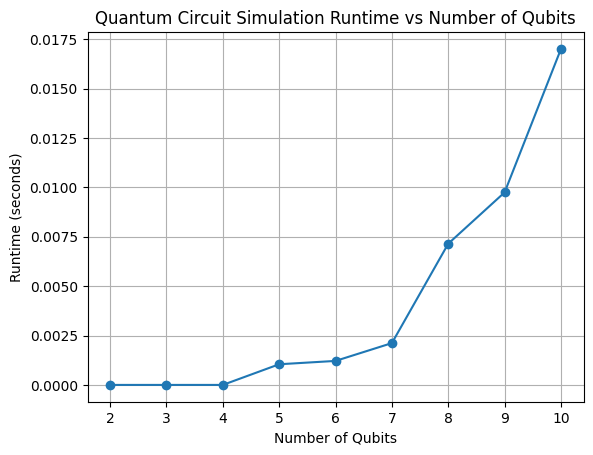

In [34]:
import numpy as np
import time
import matplotlib.pyplot as plt

#Quantum gates
X = np.array([[0, 1], [1, 0]])  # Pauli-X gate
H = (1 / np.sqrt(2)) * np.array([[1, 1], [1, -1]])  # Hadamard gate
CNOT = np.array([[1, 0, 0, 0],  # CNOT gate
                 [0, 1, 0, 0],
                 [0, 0, 0, 1],
                 [0, 0, 1, 0]])
I = np.eye(2)
# Initialize the quantum state in |0>^n
def initialize_state(n_qubits):
    state = np.zeros(2**n_qubits)  # Initialize a 1D array with 2^n elements
    state[0] = 1  # Set the amplitude of the |0>^n state to 1
    return state

# Applying a single-qubit gate to a specific qubit in the state vector
def apply_single_qubit_gate(state, gate, qubit_index, n_qubits):
    # Iterate over all basis states and apply the gate on the target qubit
    new_state = np.zeros_like(state)
    for i in range(2**n_qubits):
        binary_repr = np.binary_repr(i, n_qubits)  # Get binary representation of the basis state index
        qubit_state = int(binary_repr[qubit_index])  # Extract the state of the target qubit
        # Apply the gate to the qubit
        for j in range(2):
            new_index = list(binary_repr)
            new_index[qubit_index] = str(j)
            new_index = int(''.join(new_index), 2)
            new_state[new_index] += gate[j, qubit_state] * state[i]
    
    return new_state

# Applying a two-qubit gate on a specific pair of qubits
def apply_two_qubit_gate(state, gate, qubit_index_1, qubit_index_2, n_qubits):
    new_state = np.zeros_like(state)
    for i in range(2**n_qubits):
        binary_repr = np.binary_repr(i, n_qubits)
        qubit_state_1 = int(binary_repr[qubit_index_1])
        qubit_state_2 = int(binary_repr[qubit_index_2])
        two_qubit_state = (qubit_state_1 << 1) | qubit_state_2  # Form a two-bit number from the two qubits
        
        for j in range(4):
            new_index = list(binary_repr)
            new_states = [(j >> 1) & 1, j & 1]
            new_index[qubit_index_1] = str(new_states[0])
            new_index[qubit_index_2] = str(new_states[1])
            new_index = int(''.join(new_index), 2)
            new_state[new_index] += gate[j, two_qubit_state] * state[i]
    
    return new_state

# Step 4: Define a simple quantum circuit to apply gates (H, X, and CNOT)
def apply_quantum_circuit(state, n_qubits):
    
    # Apply H on qubit 0
    state = apply_single_qubit_gate(state, H, 0, n_qubits)
    # Apply X on qubit 1
    state = apply_single_qubit_gate(state, X, 1, n_qubits)
    # Apply CNOT on qubits 0 (control) and 1 (target)
    state = apply_two_qubit_gate(state, CNOT, 0, 1, n_qubits)
    
    return state

# Measuring runtime for increasing number of qubits
def measure_runtime(max_qubits):
    
    runtimes = []
    for n_qubits in range(2, max_qubits + 1):
        state = initialize_state(n_qubits)  # Initialize the state for n_qubits
        start_time = time.time()  # Start time
        state = apply_quantum_circuit(state, n_qubits)  # Apply the quantum circuit
        end_time = time.time()  # End time
        runtimes.append(end_time - start_time)  # Calculate the runtime
    return runtimes

# Plotting the runtime as a function of the number of qubits
def plot_runtimes(max_qubits):
    
    runtimes = measure_runtime(max_qubits)
    plt.plot(range(2, max_qubits + 1), runtimes, marker='o')
    plt.xlabel('Number of Qubits')
    plt.ylabel('Runtime (seconds)')
    plt.title('Quantum Circuit Simulation Runtime vs Number of Qubits')
    plt.grid()
    plt.show()

# Run the simulation for up to 10 qubits and plot the results
plot_runtimes(10)
